In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from clean_data import clean_data
from itertools import repeat
import numpy as np
from sklearn.decomposition import NMF
from run_nmf import recon_error
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../../StateNames.csv')

In [3]:
df = clean_data(df)

In [247]:
pd.set_option('max_rows', 500)

In [236]:
fem = df[df['Gender']=='F'].drop(['Id', 'Name'], axis=1)
# fem = fem.drop(['Id', 'Name'], axis=1)

In [237]:
fem.head()

Gender  Count_by_name  new_name    name_gender tuple_index  Count  \
Year State                                                                     
1910 AK         F             14      mary      (mary, F)  (1910, AK)    115   
     AK         F             12     annie     (annie, F)  (1910, AK)    115   
     AK         F             10      anna      (anna, F)  (1910, AK)    115   
     AK         F              8  margaret  (margaret, F)  (1910, AK)    115   
     AK         F              7     helen     (helen, F)  (1910, AK)    115   

            count_norm  
Year State              
1910 AK       0.121739  
     AK       0.104348  
     AK       0.086957  
     AK       0.069565  
     AK       0.060870

In [7]:
subset = fem[:20]
subset = subset.drop(['Gender', 'Id', 'Count', 'count_norm'], axis=1)

In [6]:
# year_doc = []
# for index, row in asdf[(asdf.index.get_level_values(level=0)==1910) & (asdf.index.get_level_values(level=1)=='AK')].iterrows():
#     year_doc.extend([row['new_name']] * row['Count_by_name'])

In [211]:
# docs = []

# for item in subset.tuple_index.unique():
#     names = []
#     single_doc = []
#     frame = subset[subset.tuple_index==item]
    
#     for line in next(frame.iterrows())[1]:
#         print "line: {}".format(line)
#     for i in frame.new_name.values: 
        
#         print len([i]*frame.iloc[0]['Count_by_name'])
#         single_doc += names
#     docs.append(single_doc)
#     print subset.new_name.values * subset.Count_by_name.values

In [227]:
# docs = []

# for index, row in subset.iterrows():
#     year_doc = []
# #     for i in index:
#     year_doc.extend(repeat(row['new_name'], row['Count_by_name']))
#     docs.append(year_doc)

# for index, row in subset.iterrows():
#     year_doc = []
#     for i in index:
#         for j in xrange(row['Count_by_name']):
#             year_doc.append(row['new_name'])
#     docs.append(year_doc)

In [73]:
# docs_list = []
# for (year, state) in subset.index:
# #     count = subset[(subset.index.get_level_values(level=0)==year) & 
# #                    (subset.index.get_level_values(level=1)==state)]['Count_by_name']
# #     name = subset[(subset.index.get_level_values(level=0)==year) & 
# #                (subset.index.get_level_values(level=1)==state)]['new_name']
#     df = subset[(subset.index.get_level_values(level=0)==year) & 
#                (subset.index.get_level_values(level=1)==state)]
#     name = df.new_name
#     docs_list.append(name)

In [ ]:
# grouped = asdf.groupby(['tuple_index','new_name']).sum()['Count_by_name']
# asdf['tupled'] = zip(asdf.new_name, asdf.Count_by_name)
# count_series = asdf.tupled
# count_dict = count_series.to_dict()

In [42]:
#this format doesn't work with the vectorizer classes
def documentizer(df):
    docs = []
    for (year, state) in set(df.index.values):
        year_doc = []
        for index, row in df[(df.index.get_level_values(level=0)==year) & (df.index.get_level_values(level=1)==state)].iterrows():
            year_doc.extend([row['new_name']] * row['Count_by_name'])
        docs.append(year_doc)
    return docs

In [ ]:
# docs = []
# for (year, state) in set(subset.index.values):
#     year_doc = []
#     for index, row in subset[(subset.index.get_level_values(level=0)==year) & (subset.index.get_level_values(level=1)==state)].iterrows():
#         year_doc.extend([row['new_name']] * row['Count_by_name'])
#     docs.append(year_doc)

In [12]:
# fem_docs = documentizer(fem) 
#this format doesn't work with TFIDF

In [20]:
# vocab_set = set()
# [[vocab_set.add(token) for token in tokens] for tokens in fem_docs]
# vocab = list(vocab_set)

In [21]:
# matrix = [[0] * len(vocab) for doc in fem_docs]
# vocab_dict = dict((word, i) for i, word in enumerate(vocab))

# for i, words in enumerate(fem_docs):
#     for word in words:
#         matrix[i][vocab_dict[word]] += 1

In [67]:
# fem_sub = fem.iloc[:10000,:]

In [224]:
def document_transform(df):
    docs = []
    for (year, state) in sorted(set(df.index.values)):
        year_str = '' 
        for index, row in df[(df.index.get_level_values(level=0)==year) & (df.index.get_level_values(level=1)==state)].iterrows():
            year_str += ((row['new_name']+' ') * row['Count_by_name'])
        docs.append(year_str)
    return docs

In [225]:
fem_docs = document_transform(fem)

In [65]:
cv = CountVectorizer()
cv.fit_transform(test)

<63x415 sparse matrix of type '<type 'numpy.int64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [226]:
tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(fem_docs)

In [231]:
names = tfidf.get_feature_names()

In [12]:
array_vec = vectors.toarray()

In [89]:
def get_top_values(lst, n, labels):
    '''
    INPUT: LIST, INTEGER, LIST
    OUTPUT: LIST

    Given a list of values, find the indices with the highest n values.
    Return the labels for each of these indices.
    '''
    return [labels[i] for i in np.argsort(lst)[-1:-n-1:-1]]

In [13]:
# avg = np.sum(array_vec,axis=0) / np.sum(array_vec>0,axis=0)
# print "top 10 by average tf-idf"
# print get_top_values(avg, 20, names)

In [14]:
# total = np.sum(array_vec, axis=0)
# print "top 10 by total tf-idf"
# print get_top_values(total, 20, words)

In [15]:
# vectorizer2 = TfidfVectorizer(use_idf=False)
# # make documents into one giant document for this purpose
# vectors2 = vectorizer2.fit_transform(fem_docs).toarray()
# print "top 10 by tf across all corpus"
# print get_top_values(vectors2[0], 10, words)

In [232]:
fem_index = sorted(set(fem.index.values))

In [40]:
re_df = pd.DataFrame(data=vectors, index=fem_index, columns=names)

In [46]:
W, H, fem_nmf = run_nmf(array_vec, 8)

In [29]:
# W = pd.DataFrame(W, index=fem_index)

In [30]:
# H = pd.DataFrame(H, columns=names)

In [43]:
cols_index = H.columns

In [37]:
def run_nmf(df,params):
    nmf = NMF(n_components=params)
    W = nmf.fit_transform(df)
    H = nmf.components_
    error = nmf.reconstruction_err_
    return W, H, nmf, error

In [35]:
def print_top_features(W, H, features, top_features, data_matrix):
    print "Reconstruction Error: %f" %reconst_mse(data_matrix, W, H)
    for latent_num, latent in enumerate(H):
        print "Latent Feature %d" % (int(latent_num) + 1)
        print [features[i] for i in latent.argsort()[:-top_features-1:-1]]
        print

In [47]:
print_top_features(W,H,names,20)

Latent Feature 1
[u'betty', u'barbara', u'shirley', u'mary', u'patricia', u'joan', u'joyce', u'dorothy', u'carol', u'beverly', u'marilyn', u'doris', u'phyllis', u'nancy', u'lois', u'jean', u'donna', u'norma', u'dolores', u'gloria']

Latent Feature 2
[u'ashley', u'jessica', u'brittany', u'samantha', u'kayla', u'megan', u'taylor', u'amanda', u'lauren', u'emily', u'hannah', u'sarah', u'courtney', u'amber', u'kelsey', u'nicole', u'chelsea', u'alyssa', u'danielle', u'alexis']

Latent Feature 3
[u'madison', u'isabella', u'abigail', u'ava', u'olivia', u'emma', u'sophia', u'chloe', u'addison', u'alexis', u'hannah', u'hailey', u'emily', u'mia', u'taylor', u'avery', u'brooklyn', u'nevaeh', u'kaylee', u'lily']

Latent Feature 4
[u'linda', u'mary', u'patricia', u'susan', u'sharon', u'sandra', u'karen', u'deborah', u'barbara', u'carol', u'debra', u'nancy', u'diane', u'donna', u'judy', u'judith', u'pamela', u'kathleen', u'cheryl', u'brenda']

Latent Feature 5
[u'lisa', u'tammy', u'kimberly', u'lori'

In [48]:
transpose = array_vec.T

In [49]:
W_, H_, fem_name_nmf = run_nmf(transpose, 8)

In [56]:
print_top_features(W_,H_,fem_index,20)

Latent Feature 1
[(1913, 'MI'), (1914, 'MI'), (1912, 'MI'), (1915, 'MI'), (1911, 'MI'), (1916, 'MI'), (1915, 'IL'), (1915, 'MT'), (1916, 'IL'), (1910, 'MI'), (1914, 'IL'), (1913, 'WA'), (1913, 'IL'), (1917, 'MT'), (1917, 'MI'), (1910, 'WA'), (1918, 'NJ'), (1912, 'MT'), (1916, 'MN'), (1912, 'WA')]

Latent Feature 2
[(1993, 'KY'), (1994, 'WV'), (1992, 'IN'), (1993, 'TN'), (1993, 'IN'), (1994, 'KY'), (1994, 'TN'), (1992, 'MO'), (1992, 'OH'), (1993, 'WV'), (1993, 'NC'), (1993, 'OH'), (1992, 'KY'), (1993, 'VA'), (1991, 'IN'), (1993, 'AL'), (1993, 'AR'), (1992, 'TN'), (1993, 'MI'), (1994, 'AR')]

Latent Feature 3
[(2009, 'MO'), (2009, 'OH'), (2009, 'MI'), (2010, 'OH'), (2010, 'MI'), (2010, 'PA'), (2009, 'IN'), (2011, 'VA'), (2010, 'MO'), (2011, 'PA'), (2010, 'VA'), (2011, 'NC'), (2009, 'PA'), (2011, 'MI'), (2011, 'OH'), (2010, 'NC'), (2009, 'KS'), (2008, 'OH'), (2012, 'VA'), (2010, 'IN')]

Latent Feature 4
[(1966, 'OK'), (1966, 'MT'), (1965, 'IN'), (1965, 'KS'), (1967, 'KS'), (1966, 'KS'), (

In [53]:
##MALE NAMES

(20031, 8)

In [4]:
male = df[df['Gender']=='M']
male = male.drop(['Id', 'Name'], axis=1)

In [9]:
male_docs = document_transform(male)

In [11]:
tfidf = TfidfVectorizer()
male_vectors = tfidf.fit_transform(male_docs)

<20x13139 sparse matrix of type '<type 'numpy.float64'>'
	with 2397 stored elements in Compressed Sparse Row format>

In [12]:
male_vec_array = male_vectors.toarray()

In [17]:
names = tfidf.get_feature_names()
Wm, Hm, male_nmf = run_nmf(male_vec_array, 8)

In [18]:
print_top_features(Wm, Hm, names,20)

Latent Feature 1
[u'john', u'robert', u'william', u'george', u'joseph', u'james', u'charles', u'edward', u'richard', u'frank', u'donald', u'harold', u'raymond', u'walter', u'paul', u'thomas', u'arthur', u'harry', u'albert', u'ralph']

Latent Feature 2
[u'tyler', u'joshua', u'brandon', u'zachary', u'jacob', u'ryan', u'matthew', u'nicholas', u'justin', u'cody', u'kyle', u'christopher', u'jordan', u'austin', u'michael', u'andrew', u'dylan', u'alexander', u'joseph', u'jonathan']

Latent Feature 3
[u'aiden', u'ethan', u'jayden', u'mason', u'logan', u'liam', u'noah', u'jackson', u'brayden', u'elijah', u'hunter', u'gavin', u'landon', u'caleb', u'carter', u'connor', u'wyatt', u'jacob', u'dylan', u'gabriel']

Latent Feature 4
[u'jason', u'christopher', u'michael', u'matthew', u'joshua', u'brian', u'ryan', u'jeremy', u'justin', u'eric', u'david', u'chad', u'kevin', u'daniel', u'james', u'jonathan', u'jeffrey', u'adam', u'robert', u'brandon']

Latent Feature 5
[u'james', u'william', u'willie', u'

In [20]:
male_index = sorted(set(male.index.values))
name_vec = male_vec_array.T

In [86]:
Wm2, Hm2, male_nmf2, nmf_error = run_nmf(name_vec, 20)
print_top_features(Wm2, Hm2, male_index,20)

TypeError: print_top_features() takes exactly 5 arguments (4 given)

In [88]:
print_top_features(Wm2, Hm2, male_index,20,name_vec)

Reconstruction Error: 0.000005
Latent Feature 1
[(1914, 'NV'), (1910, 'WY'), (1910, 'DC'), (1912, 'DC'), (1910, 'DE'), (1920, 'DC'), (1910, 'AK'), (1922, 'DC'), (1911, 'NV'), (1913, 'NV'), (1913, 'DC'), (1914, 'DE'), (1927, 'DE'), (1916, 'DE'), (1921, 'DC'), (1913, 'DE'), (1917, 'DC'), (1935, 'DE'), (1913, 'AK'), (1926, 'DC')]

Latent Feature 2
[(1987, 'ME'), (1984, 'IA'), (1983, 'IA'), (1983, 'ND'), (1985, 'IA'), (1982, 'IA'), (1986, 'ME'), (1988, 'ME'), (1985, 'NE'), (1983, 'MN'), (1983, 'NE'), (1984, 'WI'), (1981, 'ND'), (1981, 'IA'), (1984, 'MN'), (1985, 'WI'), (1988, 'WI'), (1985, 'MN'), (1985, 'ME'), (1983, 'SD')]

Latent Feature 3
[(2004, 'SD'), (2003, 'ND'), (2004, 'ND'), (2003, 'SD'), (2002, 'ND'), (2006, 'WV'), (2005, 'SD'), (2003, 'WY'), (2003, 'MT'), (2002, 'SD'), (2006, 'ND'), (2006, 'SD'), (2006, 'WY'), (2005, 'WY'), (2005, 'ND'), (2004, 'WY'), (2005, 'WV'), (2005, 'IA'), (2007, 'WV'), (2007, 'WY')]

Latent Feature 4
[(1971, 'DC'), (1969, 'DC'), (1972, 'DC'), (1970, 'DC')

In [32]:
recon_error(name_vec,12)

22.719587269640282

In [25]:
def reconst_mse(target, left, right):
    return (np.array(target - left.dot(right))**2).mean()

In [33]:
reconst_mse(name_vec, Wm2, Hm2)

7.1655913830319164e-06

In [34]:
def run_tfidf_nmf(array, n_factors, features):

    W, H, nmf, error = run_nmf(df,n_factors)

    print "SKlearn error: %f" %error
    print print_top_features(W,H,features,20,array)

    return W, H, nmf

In [36]:
def reconst_error_sum(target, left, right):
    return (np.array(target - left.dot(right))**2).sum()

In [101]:
k_list_76_100 = [x for x in range(76,101,2)]
error_list6 = []

for k in k_list_76_100:
    w, h, male_nmf3, error = run_nmf(name_vec, k)
    error_list6.append(error)

error_list6

[13.32305605510539,
 13.219475002509645,
 13.135823722585684,
 13.059746387686431,
 13.003180296224688,
 12.891075728769076,
 12.74217998964513,
 12.683901708048088,
 12.645278120456048,
 12.520181281567147,
 12.450980586512637,
 12.403961035120199,
 12.333842760503307]

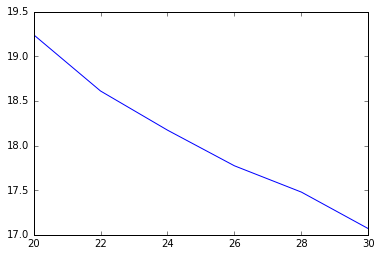

In [51]:
plt.plot(k_list2, error_list2)

In [59]:
a = error_list.extend(error_list2)

In [60]:
b = k_list.extend(k_list2)

In [73]:
tot_error = [40.34052623854491,
 31.549051502945478,
 27.86328070509829,
 25.23872672346625,
 24.02821742196193,
 22.536573560173057,
 21.600041922735354,
 20.576412267420093,
 19.868282162401414,
 19.24152132560906,
 18.610721941383588,
 18.17216259007148,
 17.772714728899473,
 17.47813667634361,
 17.06849617731421]

In [103]:
total_k = [x for x in range(2,101,2)]

In [102]:
total_error = [40.34052623854491,
 31.549051502945478,
 27.86328070509829,
 25.23872672346625,
 24.02821742196193,
 22.536573560173057,
 21.600041922735354,
 20.576412267420093,
 19.868282162401414,
 19.24152132560906,
 18.610721941383588,
 18.17216259007148,
 17.772714728899473,
 17.47813667634361,
 17.06849617731421,
 16.81737754567099,
 16.47190266813654,
 16.248982831156127,
 16.036541999647664,
 15.822119028468805,
 15.65485885808656,
 15.429941401063765,
 15.24244290502724,
 15.051475664120156,
 14.896923594175682,
 14.739897133240747,
 14.630310017851906,
 14.455454572952524,
 14.3356672157484,
 14.20813661202442,
 14.073124398982603,
 13.95963544677549,
 13.822426043520348,
 13.754060793449282,
 13.637776895989896,
 13.559897830387262,
 13.462511279712475,
 13.32305605510539,
 13.219475002509645,
 13.135823722585684,
 13.059746387686431,
 13.003180296224688,
 12.891075728769076,
 12.74217998964513,
 12.683901708048088,
 12.645278120456048,
 12.520181281567147,
 12.450980586512637,
 12.403961035120199,
 12.333842760503307]

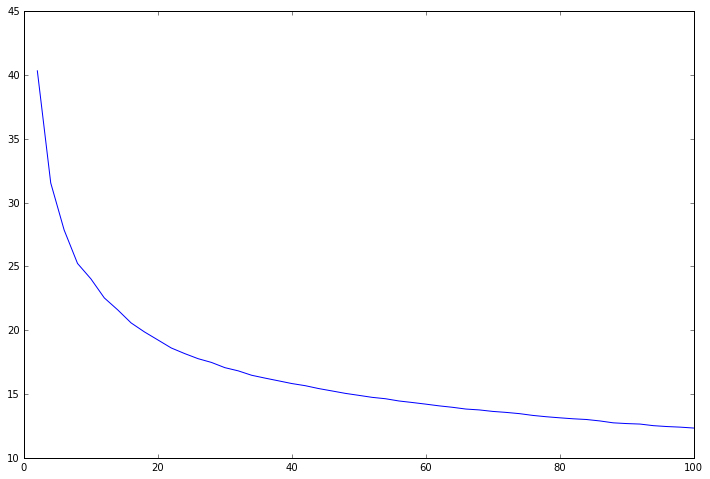

In [105]:
fig = plt.figure(figsize=(12,8))
plt.plot(total_k, total_error)

In [122]:
###SOME SVD

In [109]:
from numpy.linalg import svd

In [110]:
U, sigma, VT = svd(name_vec)

In [111]:
total_energy = np.sum(sigma ** 2)

In [112]:
total_energy * .9

4819.4999999999909

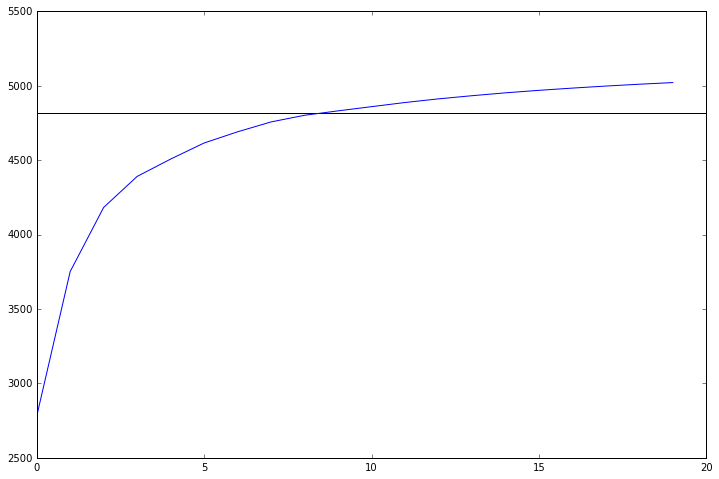

In [116]:
fig = plt.figure(figsize=(12,8))
cumulative = np.cumsum(sigma ** 2)[:20]
plt.plot(cumulative)
plt.hlines(4819.5, 0,20)

In [119]:
VT_8 = VT[:8,:]

In [121]:
features = male_index
for i, row in enumerate(VT_8):
    top_features = [male_index[index] for index in row.argsort()[:-10-1:-1]]
    print top_features

[(2013, 'ND'), (2012, 'VT'), (2014, 'ND'), (2014, 'SD'), (2011, 'ND'), (2010, 'ND'), (2012, 'ND'), (2011, 'HI'), (2013, 'SD'), (2014, 'WY')]
[(1995, 'WA'), (1997, 'ME'), (1999, 'WA'), (1996, 'WA'), (2000, 'OR'), (1996, 'CO'), (2000, 'WA'), (1997, 'WA'), (1999, 'OR'), (1997, 'CO')]
[(1969, 'ND'), (1969, 'IA'), (1969, 'MN'), (1970, 'IA'), (1967, 'IA'), (1967, 'ND'), (1970, 'MN'), (1969, 'NE'), (1968, 'MN'), (1971, 'WI')]
[(2012, 'ND'), (2013, 'IA'), (2011, 'IA'), (2012, 'IN'), (2011, 'IN'), (2012, 'IA'), (2013, 'IN'), (2011, 'ND'), (2010, 'ND'), (2010, 'IA')]
[(1937, 'NH'), (1934, 'NH'), (1930, 'NH'), (1935, 'NH'), (1934, 'VT'), (1933, 'NH'), (1932, 'NH'), (1932, 'VT'), (1931, 'NH'), (1929, 'NH')]
[(1911, 'CT'), (1914, 'CT'), (1917, 'CT'), (1912, 'CT'), (1916, 'RI'), (1916, 'CT'), (1913, 'CT'), (1915, 'RI'), (1915, 'CT'), (1918, 'CT')]
[(1937, 'NE'), (1935, 'NE'), (1936, 'NE'), (1934, 'NE'), (1931, 'NE'), (1933, 'NE'), (1932, 'NE'), (1935, 'SD'), (1933, 'SD'), (1936, 'SD')]
[(2013, 'WV')

In [123]:
##TF-IDF matrix function

In [126]:
my_idf = np.log((float(n_samples) + 1) / (df + 1)) + 1.0

NameError: name 'n_samples' is not defined

In [ ]:
sklearn_idf = np.log(float(n_samples) / df) + 1.0

In [128]:
df.head()

Id      Name Gender  Count_by_name  new_name    name_gender  \
Year State                                                                
1910 AK      1      Mary      F             14      mary      (mary, F)   
     AK      2     Annie      F             12     annie     (annie, F)   
     AK      3      Anna      F             10      anna      (anna, F)   
     AK      4  Margaret      F              8  margaret  (margaret, F)   
     AK      5     Helen      F              7     helen     (helen, F)   

           tuple_index  Count  count_norm  
Year State                                 
1910 AK     (1910, AK)    115    0.121739  
     AK     (1910, AK)    115    0.104348  
     AK     (1910, AK)    115    0.086957  
     AK     (1910, AK)    115    0.069565  
     AK     (1910, AK)    115    0.060870

In [239]:
# norm_pivot = pd.pivot_table(df, values = 'Count_by_name', index = df.tuple_index, columns= df.name_gender)
fem_pivot = pd.pivot_table(fem, values = 'Count_by_name', index = fem.tuple_index, columns= fem.name_gender)

In [240]:
fem_doc_freq = fem_pivot.count()

In [242]:
fem_pivot = fem_pivot.fillna(0)

In [219]:
fem_column_idf = np.log((fem_pivot.shape[0] + 1.) / (fem_doc_freq + 1.)) + 1

In [220]:
fem_processed = fem_pivot * fem_column_idf

(5355, 20031)

In [150]:
docf_dict = {i:value for i, value in series.iteritems()}

In [152]:
n_samples, n_names = norm_pivot.shape

In [154]:
# def my_idf(name_col, count_value, n_samples):
#     doc_freq = docf_dict[name_col]
    '''return''' np.log((float(n_samples) + 1) / (doc_freq + 1)) + 1.0

In [182]:
doc_frequency = np.sum(~np.isnan(norm_pivot), axis=0)

In [191]:
column_idf = np.log((norm_pivot.shape[0] + 1.) / (doc_frequency + 1.)) + 1

In [194]:
processed = norm_pivot.fillna(0) * column_idf

In [259]:
norm_pivot.shape

(5355, 33170)

In [256]:
processed.iloc[:,24].max()

58.267100910536136

In [257]:
fem_processed.iloc[:,24].max()

15.0

In [227]:
type(vectors)

scipy.sparse.csr.csr_matrix

In [233]:
vectors_df = pd.DataFrame(data=vectors, index=fem_index, columns=names)

In [253]:
fem_processed.head()

name_gender,"(aadhya, F)","(aadya, F)","(aahana, F)","(aahna, F)","(aaima, F)","(aalaya, F)","(aalayah, F)","(aaleah, F)","(aaleyah, F)","(aalia, F)",...,"(zykira, F)","(zykiria, F)","(zyla, F)","(zylah, F)","(zyon, F)","(zyonna, F)","(zyra, F)","(zyrah, F)","(zyria, F)","(zyriah, F)"
tuple_index,,,,,,,,,,,,,,,,,,,,,
"(1910, AK)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1910, AL)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1910, AR)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1910, AZ)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(1910, CA)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
